# Projeto 1 

**aluno:** Pedro Hiroshi Ely Ito

**nUSP:** 10288803

## 1)

### a)

#### i) obtendo o estimador:

Considere o modelo $Y_i = \beta_1 X_i$. Minimizando $\sum_i e_i^2 = \sum_i (Y_i - \beta_1 X_i)^2$:

$$
\frac{\partial}{\partial \beta_1}\sum_i (Y_i - \hat\beta_1 X_i)^2 = 0\\
\sum_i 2(Y_i - \hat\beta_1 X_i)X_i = 0\\
2\sum_i (Y_iX_i - \hat\beta_1 X_i^2) = 0\\
\hat\beta_1 = \frac{\sum_i Y_iX_i}{\sum_i X_i^2}
$$

#### ii) mostrando que $\hat\beta_1$ não é viciado:

$$
E[\hat\beta_1] = E\left[\frac{\sum_i Y_iX_i}{\sum_i X_i^2}\right]\\
E[\hat\beta_1] = E\left[\sum_i c_i Y_i\right]\\
E[\hat\beta_1] = \sum_i c_i E[Y_i]\\
E[\hat\beta_1] = \sum_i c_i (\beta_1 X_i)\\
E[\hat\beta_1] = \sum_i \frac{X_i}{\sum_i X_i^2} (\beta_1 X_i)\\
E[\hat\beta_1] = \sum_i \frac{X_i^2}{\sum_i X_i^2} \beta_1\\
E[\hat\beta_1] = \beta_1.\\
$$

onde $c_i = \frac{X_i}{\sum_i X_i^2}$ 

#### iii) ajustando o modelo:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

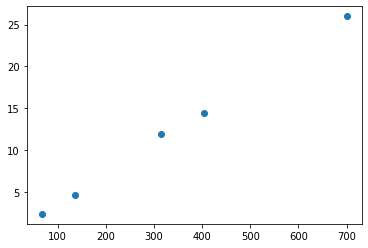

In [2]:
# lendo os dados:

dist = np.array([68, 137, 315, 405, 700])
vel = np.array([2.4, 4.7, 12.0, 14.44, 26.0])

#visualizando os dados:
plt.scatter(dist,vel)

In [12]:
# calculando o estimador:

# implementando o estimador derivado anteriormente:
beta1_no_intercept = np.sum([dist[i]*vel[i] for i in range(len(dist))])/np.sum([x**2 for x in dist])
print("beta1 sem intercepto:", beta1_no_intercept)

beta1 sem intercepto: 0.03687060850352092


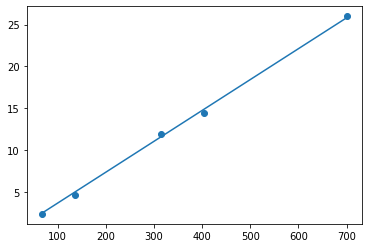

In [13]:
# verificando o plot da reta obtida
plt.scatter(dist,vel)
plt.plot(dist, beta1_no_intercept*dist)

#### iv) verificando a significância da regressão:

Fazendo o teste de hipótese:

$$
H_0: \hat\beta_1 = 0\\
H_1: \hat\beta_1 \neq 0
$$

Para isso, calculamos a estatística $t$ como:

$$
t = \frac{\hat\beta_1}{\text{SE}(\hat\beta_1)}\\
$$

Neste caso, temos que :

$$
\text{SE} = \sqrt{\frac{\text{MSE}}{S_{XX}}}
$$

onde:

$$
\text{MSE} = \frac{\sum_i (y_i-\hat y_i)^2}{n-1}
$$

isto é,

$$
t = \frac{\hat\beta_1}{\sqrt{\frac{\frac{\sum_i (y_i-\hat y_i)^2}{n-1}}{S_{XX}}}} 
$$

In [16]:
t = lambda beta1, ssr, sxx: beta1/np.sqrt(ssr/sxx)
sxx =  lambda X: np.sum([(X[i] - np.mean(X))**2 for i in range(3)])

ssr_no_intercept = 0.5627/4
t_no_intercept = t(beta1_no_intercept, ssr_no_intercept, sxx(dist))
print("t-statistic =", t_no_intercept)
print("t_alpha/2,1 =", 12.706)
print("Rejeitar H0:", abs(t_no_intercept) >= 12.706)

t-statistic = 31.317702062270467
t_alpha/2,1 = 12.706
Rejeitar H0: True


Como $|t| > t_{\alpha/2, 1}$, rejeitamos $H_0$ e a regressão é significativa.

### b)

#### i) ajustado o modelo:

Nesse caso, podemos usar os estimadores fornecidos:

$$
\hat\beta_1 = \frac{S_{XX}}{S_{XY}}\\
\hat\beta_0 = \bar Y - \hat\beta_1\bar X 
$$

In [17]:
sxy = lambda X,Y: np.sum([(X[i] - np.mean(X))*(Y[i] - np.mean(Y)) for i in range(3)])

beta1_intercept = sxy(dist, vel)/sxx(dist)
beta0 = np.mean(vel) - beta1_intercept*np.mean(dist)
print("beta1 com intercepto", beta1_intercept)
print("beta0 com intercepto", beta0)

beta1 com intercepto 0.037418738238105084
beta0 com intercepto -0.2530899273841527


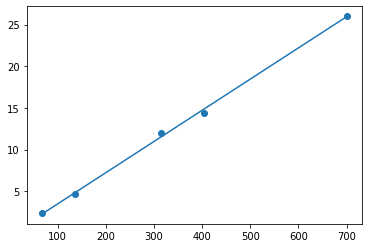

In [7]:
plt.scatter(dist, vel)
plt.plot(dist, beta0 + beta1_intercept*dist)

#### ii) Verificando a significância da regressão:

In [8]:
ssr_intercept = 0.4749/3

t_int = t(beta1_intercept, ssr_intercept, sxx(dist))
alpha = 0.05
print("t-statistic =", t_int)
print(f"t_{alpha/2},2 =", 4.303)
print("Rejeitar H0:", abs(t_int) >= 4.303)

t-statistic = 29.961718991147563
t_0.025,2 = 4.303
Rejeitar H0: True


Novamente, rejeitamos $H_0$ e a regressão é significativa.

#### iii) avaliando $\beta_0 = 0$:

Realizando o teste de hipótese:

$$
H_0: \beta_0 = 0\\
H_1: \beta_0 \neq 0\\
$$

Com $\text{Var}(\hat\beta_0)$ fornecido, podemos calcular $t$ como:

$$
t = \frac{\hat\beta_0}{\sqrt{\text{MSE}\frac{\sum_i X_i^2}{nS_{XX}}}}\\
t = \frac{\hat\beta_0}{\sqrt{\frac{\sum_i (y_i-\hat y_i)^2}{n-2}\frac{\sum_i X_i^2}{nS_{XX}}}}
$$


In [9]:
var = np.sum(dist**2)/(5*sxx(dist))
MSE = 0.4749/3
t_intercept = lambda beta0, MSE, var, X: beta0/np.sqrt(MSE*np.sum(X**2)/5*sxx(X))
t_int = t_intercept(beta0, MSE, var, dist)

alpha = 0.05
print("t-statistic =", t_int)
print(f"t_{alpha/2},2 =", 4.303)
print("Rejeitar H0:", abs(t_int) >= 4.303)
print(35*"-")
alpha = 0.01
print(f"t_{alpha/2},2 =", 9.925)
print("Rejeitar H0:", abs(t_int) >= 9.925)

t-statistic = -5.066296990331227e-06
t_0.025,2 = 4.303
Rejeitar H0: False
-----------------------------------
t_0.005,2 = 9.925
Rejeitar H0: False


Assim, não rejeitamos $H_0$, tanto para $\alpha=0.05$ quanto para $\alpha=0.01$.

### c)

Calculando $R^2$ para ambos os modelos:

In [22]:
model_no_intercept = lambda x: beta1_no_intercept*x
model_intercept = lambda x: beta0 + beta1_intercept*x

def r_2(f, X, Y):
    sse = np.sum([(Y[i] - f(X[i]))**2 for i in range(len(X))])
    sst = np.sum([(Y[i] - np.mean(Y))**2 for i in range(len(Y))])
    return 1 - sse/sst

print("R^2 do modelo sem intercepto", r_2(model_no_intercept, dist, vel))
print("R^2 do modelo com intercepto", r_2(model_intercept, dist, vel))

R^2 do modelo sem intercepto 0.9983801754786045
R^2 do modelo com intercepto 0.9986304426183398


## 2)

### a)

Defina a variável aleatória $\psi = Y - \hat Y$, onde $Y$ é uma nova observação. Temos:

$$
\text{Var}(\psi) = \text{Var}(Y - \hat Y)\\
\text{Var}(\psi) = \text{Var}(Y - \beta_0 + \beta_1X)\\
\text{Var}(\psi) = \text{Var}(Y - \beta_0 + \beta_1X)\\
$$